In [83]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt


# Set up Structure for Cell height = 600 nm situation

In [84]:
#sim.reset_meep()

resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dca = 0.06  # air rigion between cell and cell
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gw = 0.08 # grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency


glass = mp.Medium(index = 2.6678) # 把 paper 裡的材料 在對應波長下拿去查詢找到的 折射率值

pml_layers = [mp.PML(thickness = dpml, direction = mp.X)]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(fcen), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y = sy),
    )
]

geometry = [
    mp.Block(
        material = glass,
        size = mp.Vector3(dsub, mp.inf, mp.inf),
        center = mp.Vector3(-0.5 * sx + dpml + dsub/2),
    )
]


In [85]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material = glass,
            size = mp.Vector3(gh, gw, mp.inf),
            center = mp.Vector3(
                -0.5 * sx + dpml + dsub + gh/2,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )


In [86]:
# 設定週期邊界條件
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

     block, center = (-0.8,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


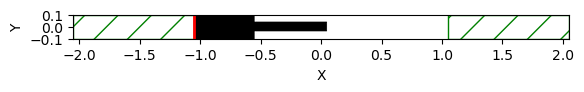

In [87]:
sim = mp.Simulation(
    cell_size = cell_size,
    boundary_layers = pml_layers,
    geometry = geometry,
    sources = sources,
    resolution = resolution,
    symmetries = symmetries,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 100)
sim.plot2D()
plt.show()

In [88]:

t_xx = (.532) # Air 光速跑完 波長 532 nm 入射光 所需的 meep unit time
dt = (t_xx / 40) # 
t = 1000

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy + gp/2
y_obs = y_obs_start
print(int((t_xx)/dt))


40


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00100398 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.2 x 0 with resolution 500
     block, center = (-0.8,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0810869 s
-----------
Meep progress: 12.301/1000.0 = 1.2% done in 4.0s, 321.2s to go
on time step 12301 (time=12.301), 0.000325195 s/step
Meep progress: 24.281/1000.0 = 2.4% done in 8.0s, 321.5s to go
on time step 24282 (time=24.282), 0.000333912 s/step
Meep progress: 35.859/1000.0 = 3.6% done in 12.0s, 322.7s to go
on time step 35864 (time=35.864), 0.000345366 s/step
Meep progress: 47.281/1000.0 = 4

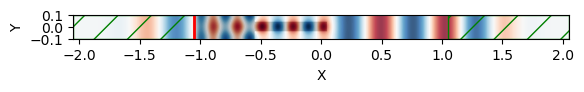

In [89]:

### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [90]:
ez_data_list = np.array(ez_data_list)
ez_amplitude = np.abs(ez_data_list)
print(len(ez_amplitude))
print(max(ez_amplitude))
print(ez_amplitude[20000])
print(1 + int(round(t_xx/dt)))

76923
0.14966307417824778
0.10402371115886781
41


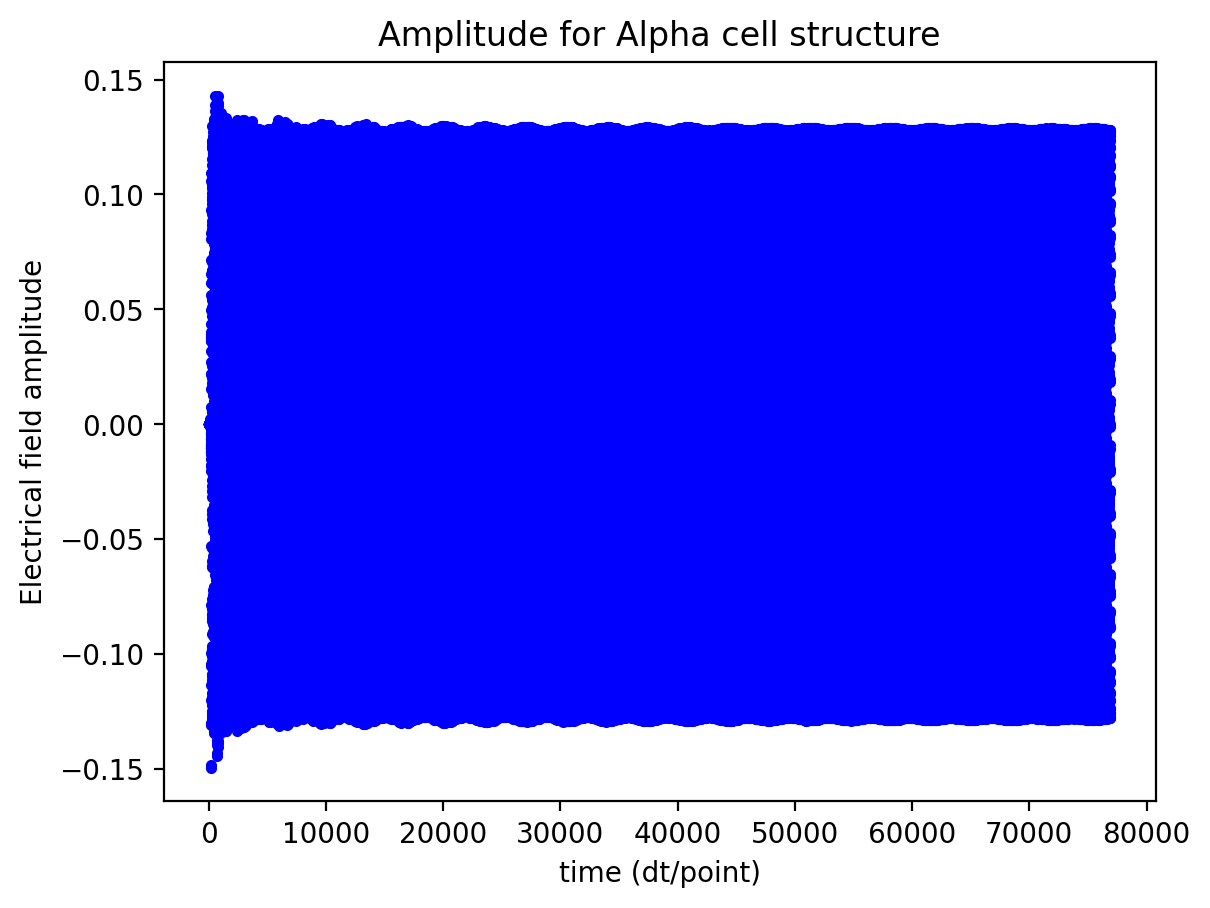

In [91]:
plt.figure(dpi = 200)
plt.title('Amplitude for Alpha cell structure')
plt.ylabel('Electrical field amplitude')
plt.xlabel('time (dt/point)')
for i in range( round(len(ez_amplitude) * 0 / t) , round(len(ez_amplitude) * t / t)):
    plt.plot(i , ez_data_list[i] , 'b.')
    


In [92]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


0.10724898805534153 --------one period 內最大振福
0.10724812616561993 -------one next_period 內最大振福
8.618897215928456e-07 -----振幅誤差
(array([31896]),) --- index1
(array([31935]),) --- index2
0.10724898805534153 	 0.10724812616561993 	 8.618897215928456e-07 	 (array([31896]),) 	 (array([31935]),) 


到達誤差範圍內的所需 meep time unit 108.88160888160888 

0.106779535118426


"\n    max(ez_data_list[i + int(round(t_xx/dt))]) - max(ez_data_list[i + int(round(t_xx/dt)) + int(round(t_xx/dt))])\n    if (m_ax - max_next_period) < 10**(-6) : \n        break\n    \nfor i in range( int(round(len(ez_data_list) / t * ( t - 250) )) , int(round(len(ez_data_list) / t * ( t - 0) ))) :\n    plt.plot(i,ez_data_list[i],'b.')\n# print(ez_data_list)"

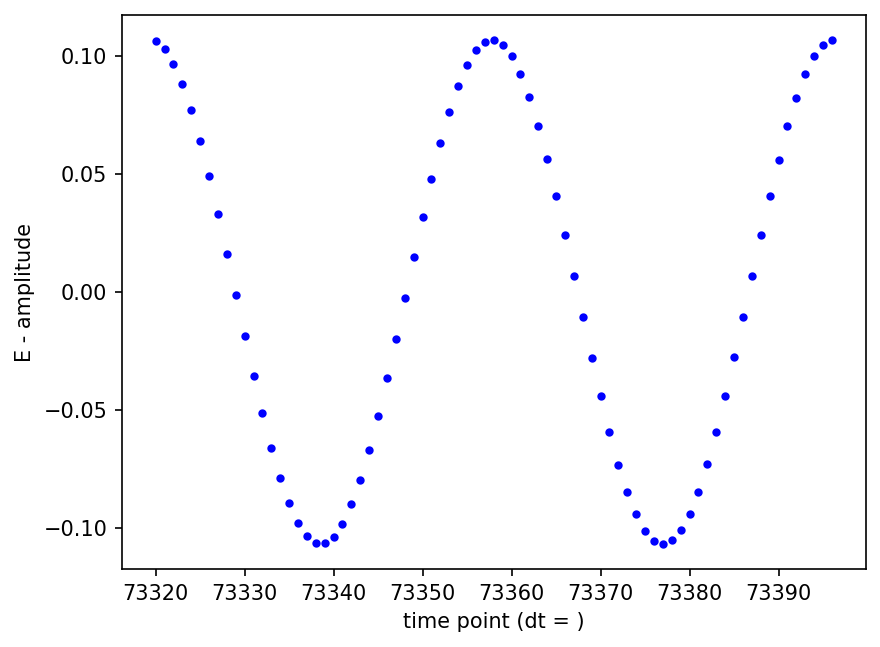

In [109]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('到達誤差範圍內的所需 meep time unit' , 16751 / len(ez_data_list) * 500 , '\n')
        break

dt_ = str(dt)
plt.figure(dpi = 150)
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)


'''
    max(ez_data_list[i + int(round(t_xx/dt))]) - max(ez_data_list[i + int(round(t_xx/dt)) + int(round(t_xx/dt))])
    if (m_ax - max_next_period) < 10**(-6) : 
        break
    
for i in range( int(round(len(ez_data_list) / t * ( t - 250) )) , int(round(len(ez_data_list) / t * ( t - 0) ))) :
    plt.plot(i,ez_data_list[i],'b.')
# print(ez_data_list)'''

# Phase for cell height = 600 nm

# ----------------------------------Simulation for Cell height =  300 nm 的--------------------------------

In [94]:

sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp * num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [95]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material = glass,
            size = mp.Vector3(gh, gw, mp.inf),
            center = mp.Vector3(
                -0.5 * sx + dpml + dsub + gh/2,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )


In [96]:
# 設定週期邊界條件
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


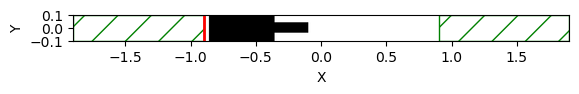

In [97]:
sim = mp.Simulation(
    cell_size = cell_size,
    boundary_layers = pml_layers,
    geometry = geometry,
    sources = sources,
    resolution = resolution,
    symmetries = symmetries,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 100)
sim.plot2D()
plt.show()

In [98]:

t_xx = (.532)   # 光走完 0.532 um 所需的 meep 時間單位
dt = (t_xx / 40)  # 在一個 sin 週期中，切 40 段
t = 1000

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002  # 測點的 x 座標
y_obs_start = -0.5 * sy + gp/2  # # 測點的 y 起始座標
y_obs = y_obs_start
print(int((t_xx)/dt))

40


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000491142 s
Working in 2D dimensions.
Computational cell is 3.8 x 0.2 x 0 with resolution 500
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0772212 s
-----------
Meep progress: 12.529/1000.0 = 1.3% done in 4.0s, 315.3s to go
on time step 12529 (time=12.529), 0.000319289 s/step
Meep progress: 25.131/1000.0 = 2.5% done in 8.0s, 310.3s to go
on time step 25133 (time=25.133), 0.000317379 s/step
Meep progress: 37.713/1000.0 = 3.8% done in 12.0s, 306.2s to go
on time step 37717 (time=37.717), 0.000317883 s/step
Meep progress: 50.259/1000.0 =

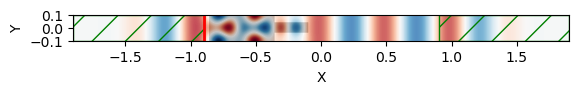

In [99]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [105]:
ez_data_list = np.array(ez_data_list)
ez_amplitude = np.abs(ez_data_list)
print(len(ez_amplitude))
print(max(ez_amplitude))
print(ez_amplitude[20000])
print(1 + int(round(t_xx/dt)))

76923
0.14783286075160076
0.03403868467563371
41


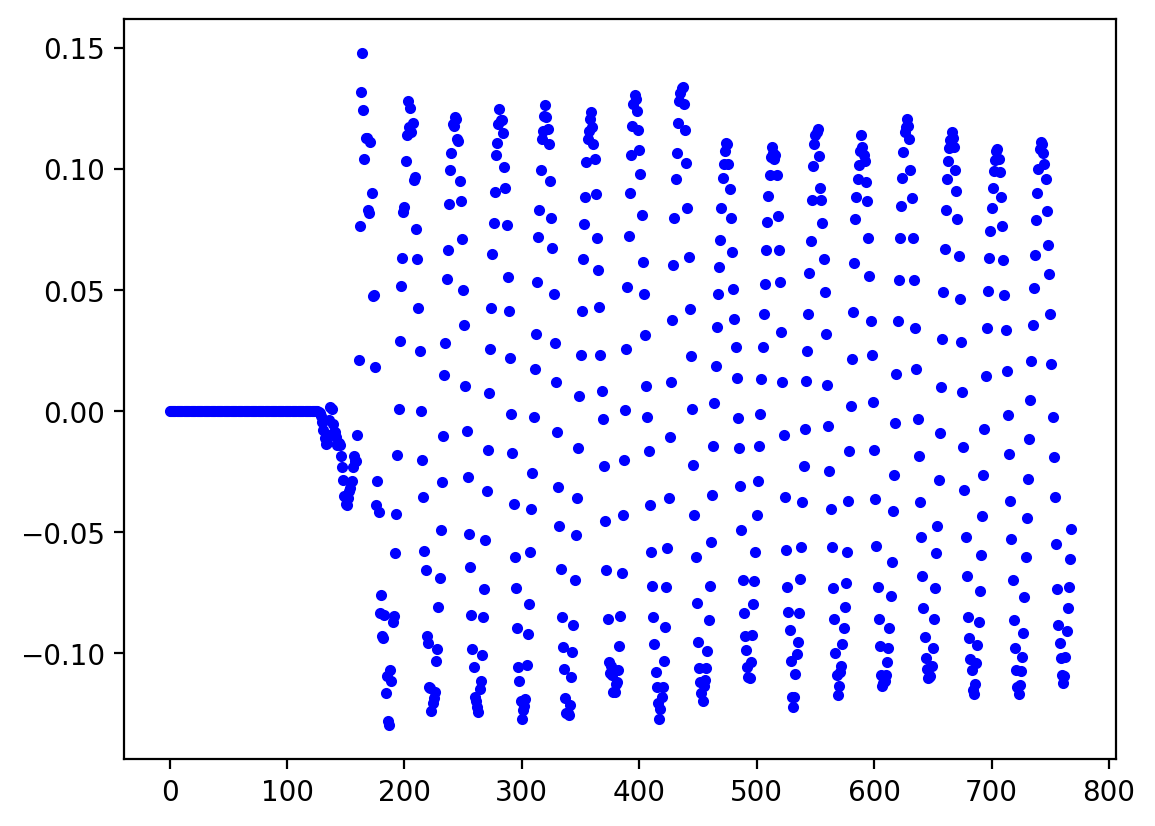

In [106]:
plt.figure(dpi = 200)
for i in range( round(len(ez_amplitude) * 0 / t) , round(len(ez_amplitude) * 10 / t)):
    plt.plot(i , ez_data_list[i] , 'b.')

In [107]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


0.10724898805534153 --------one period 內最大振福
0.10724812616561993 -------one next_period 內最大振福
8.618897215928456e-07 -----振幅誤差
(array([31896]),) --- index1
(array([31935]),) --- index2
0.10724898805534153 	 0.10724812616561993 	 8.618897215928456e-07 	 (array([31896]),) 	 (array([31935]),) 


到達誤差範圍內的所需 meep time unit 108.88160888160888 

0.106779535118426


"\n    max(ez_data_list[i + int(round(t_xx/dt))]) - max(ez_data_list[i + int(round(t_xx/dt)) + int(round(t_xx/dt))])\n    if (m_ax - max_next_period) < 10**(-6) : \n        break\n    \nfor i in range( int(round(len(ez_data_list) / t * ( t - 250) )) , int(round(len(ez_data_list) / t * ( t - 0) ))) :\n    plt.plot(i,ez_data_list[i],'b.')\n# print(ez_data_list)"

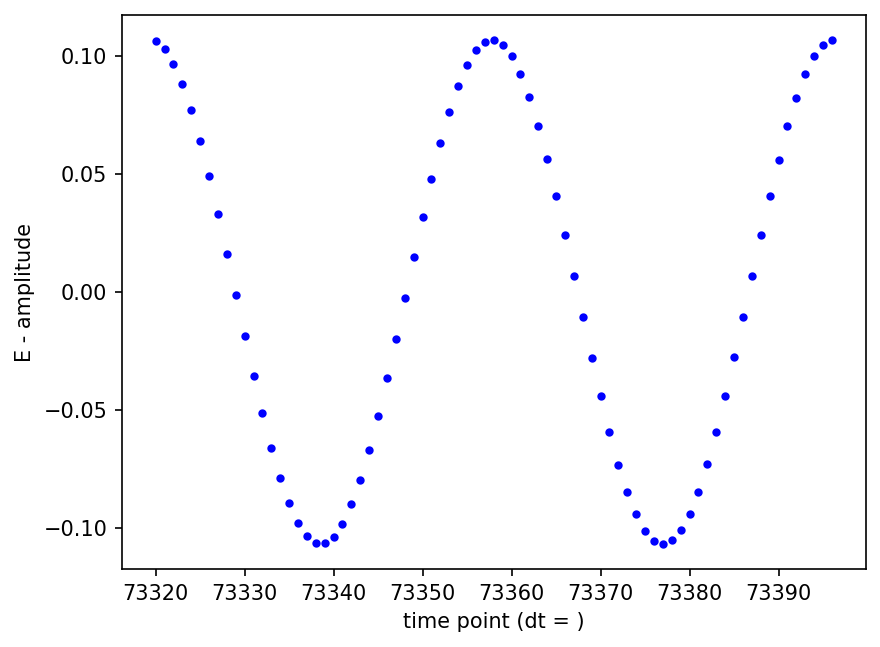

In [108]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('到達誤差範圍內的所需 meep time unit' , 16751 / len(ez_data_list) * 500 , '\n')
        break

dt_ = str(dt)
plt.figure(dpi = 150)
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)


'''
    max(ez_data_list[i + int(round(t_xx/dt))]) - max(ez_data_list[i + int(round(t_xx/dt)) + int(round(t_xx/dt))])
    if (m_ax - max_next_period) < 10**(-6) : 
        break
    
for i in range( int(round(len(ez_data_list) / t * ( t - 250) )) , int(round(len(ez_data_list) / t * ( t - 0) ))) :
    plt.plot(i,ez_data_list[i],'b.')
# print(ez_data_list)'''

In [74]:
sim.reset_meep()
f = plt.figure(dpi = 100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 30)
plt.close()

filename = "1 alpha alpha alpha structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00147486 s
Working in 2D dimensions.
Computational cell is 17.1 x 0.6 x 0 with resolution 500
     block, center = (-7.3,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.877143 s
-----------
Mee

     block, center = (-7.3,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
Meep progress: 1.24/30.0 = 4.1% done in 8.0s, 185.7s to go
on time step 1240 (time=1.24), 0.00708387 s/step
Meep progress: 1.942/30.0 = 6.5% done in 12.0s, 173.5s to go
on time step 1942 (time=1.942), 0.00570101 s/step
Meep progress: 2.6/30.0 = 8.7% done in 16

# 以下做的是 Transmittance and Spectrum of structure